<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS458 Research Assignment 3

## Administrative Setup
***

In [ ]:
import datetime
from datetime import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.4.1


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Environment

In [ ]:
#drive.mount('/content/gdrive')

## Loading Data
***

###  TensorFlow Datasets Information<br>
<div class="alert alert-block alert-info">
    <b> ag_news_subset</b><br>
    See https://www.tensorflow.org/datasets/catalog/ag_news_subset
    </div>

Get all the words in the documents (as well as the number of words in each document) by using the encoder to get the indices associated with each token and then translating the indices to tokens. But first we need to get the "unpadded" new articles so that we can get their length.

In [ ]:
# register  ag_news_subset so that tfds.load doesn't generate a checksum (mismatch) error
!cd '/content/sample_data'
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=ag_news_subset


2021-02-19 00:12:06.684682: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0219 00:12:09.560589 140582475921280 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
ag_news_subset
2021-02-19 00:12:09.562390: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-02-19 00:12:09.607915: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-02-19 00:12:09.639661: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
I0219 00:12:09.676738 140582475921280 dataset_info.py:434] Load pre-computed DatasetInfo (eg: splits, num examples,...) from GC

In [ ]:
# register  ag_news_subset so that tfds.load doesn't generate a checksum (mismatch) error
#!cd '/content/sample_data'
!cd '/root/tensorflow_datasets'
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=ag_news_subset

# Splitting data
!cd '/root/tensorflow_datasets/downloads'
dataset, info = tfds.load('ag_news_subset', with_info=True,  
                          data_dir = '/root/tensorflow_datasets/downloads', 
                          split=['train[:95%]','train[95%:]', 'test[:]'],
                          as_supervised=True)
train_dataset, validation_dataset, test_dataset = dataset

/bin/bash: line 0: cd: /root/tensorflow_datasets: No such file or directory
2021-02-19 00:18:14.860425: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0219 00:18:17.662862 140446422820736 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
ag_news_subset
2021-02-19 00:18:17.675525: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-02-19 00:18:17.743658: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-02-19 00:18:17.779816: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
I0219 00:18:17.820803 140446422820736 dataset_info.

Shuffling and writing examples to /root/tensorflow_datasets/downloads/ag_news_subset/1.0.0.incomplete677SDU/ag_news_subset-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/downloads/ag_news_subset/1.0.0.incomplete677SDU/ag_news_subset-test.tfrecord


Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/downloads/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='ag_news_subset',
    version=1.0.0,
    description='AG is a collection of more than 1 million news articles.
News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
ComeToMyHead is an academic news search engine which has been running since July, 2004.
The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
information retrieval (ranking, search, etc), xml, data compression, data streaming,
and any other non-commercial activity.
For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
It is used as a text classification benchmark in the following paper:
Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advanc

## EDA
***

In [ ]:
# Viewing some examples
tfds.as_dataframe(train_dataset.take(10),info)

,description,label
0,"AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.",3 (Sci/Tech)
1,Reuters - Major League Baseball\Monday announced a decision on the appeal filed by Chicago Cubs\pitcher Kerry Wood regarding a suspension stemming from an\incident earlier this season.,1 (Sports)
2,"President Bush #39;s quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.",2 (Business)
3,"Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.",3 (Sci/Tech)
4,"London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.",1 (Sports)
5,TOKYO - Sony Corp. is banking on the \$3 billion deal to acquire Hollywood studio Metro-Goldwyn-Mayer Inc...,0 (World)
6,"Giant pandas may well prefer bamboo to laptops, but wireless technology is helping researchers in China in their efforts to protect the engandered animals living in the remote Wolong Nature Reserve.",3 (Sci/Tech)
7,"VILNIUS, Lithuania - Lithuania #39;s main parties formed an alliance to try to keep a Russian-born tycoon and his populist promises out of the government in Sunday #39;s second round of parliamentary elections in this Baltic country.",0 (World)
8,Witnesses in the trial of a US soldier charged with abusing prisoners at Abu Ghraib have told the court that the CIA sometimes directed abuse and orders were received from military command to toughen interrogations.,0 (World)
9,"Dan Olsen of Ponte Vedra Beach, Fla., shot a 7-under 65 Thursday to take a one-shot lead after two rounds of the PGA Tour qualifying tournament.",1 (Sports)


In [ ]:
# Checking labels
print(f'There are {info.features["label"].num_classes} classes in the dataset.')
print(f'The class names are {info.features["label"].names}')

There are 4 classes in the dataset.
The class names are ['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
# classes dictionary
categories =dict(enumerate(info.features["label"].names))
categories

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

In [ ]:
# Our labels are well balanced in our training set
train_categories = [categories[label] for label in train_dataset.map(lambda text, label: label).as_numpy_iterator()]
Counter(train_categories).most_common()

[('Business', 28531), ('Sports', 28495), ('World', 28491), ('Sci/Tech', 28483)]

In [ ]:
# Total number of training records
len(train_categories)

114000

## Experiment A - Vectorizing and Embedding Text
***
Processing the raw text using the TextVectorization Layer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization

There are questions to be answered though:
1. Should we cap the number of tokens per document?
2. What should be the vocabulary size?
3. Should we include the top most common words?


Experiments A: EDA: For NLP projects, it is very important to do extensive EDA and do the preprocessing before defining models. These are the suggestions.

(a) Vocabulary Size: Tweak the vocabulary size, at least 3 levels.

(b) Editing the Vocabulary: Try unedited most frequent words, VS edit the list by deleting the most frequent words such as articles, ‘the’, ‘a’, etc.

(c) Output sequence length: Use the default VS set it to a fixed number

### Vectorizing with MAX tokens
Starting with no limits to allow for us to play around and determine what the right levels may be for the points listed above.

In [ ]:
%%time
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=None)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())

Cause: could not parse the source code of <function <lambda> at 0x7fa92d0d96a8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa92d0d96a8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa92d0d96a8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 1min 37s, sys: 31.5 s, total: 2min 9s
Wall time: 1min 10s


In [ ]:
# Checking number of words in our corpus
len(vocab)

90800

In [ ]:
# Testing a random string to see how it encodes
example = 'Kyle is working hard on his AI assignment'
encoder(example)

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 4444,    16,   784,   941,     8,    24, 12084, 10158])>

In [ ]:
# Now let's run our Training set through the encoder to do some more EDA
%%time
doc_sizes = []
corpus = []
for example, _ in train_dataset.as_numpy_iterator():
  enc_example = encoder(example)
  doc_sizes.append(len(enc_example))
  corpus+=list(enc_example.numpy())

CPU times: user 5min 10s, sys: 3.99 s, total: 5min 14s
Wall time: 4min 57s


In [ ]:
# Checking high level metrics
print("Number of Words: \t\t", len(corpus))
print("Number of Documents: \t\t", len(doc_sizes))
print("Minimum Words in a document: \t", min(doc_sizes))
print("Maximum Words in a document: \t", max(doc_sizes))

Number of Words: 		 3492762
Number of Documents: 		 114000
Minimum Words in a document: 	 3
Maximum Words in a document: 	 168


1. Should we cap the number of tokens per document?

Text(0, 0.5, 'Number of AG News Articles')

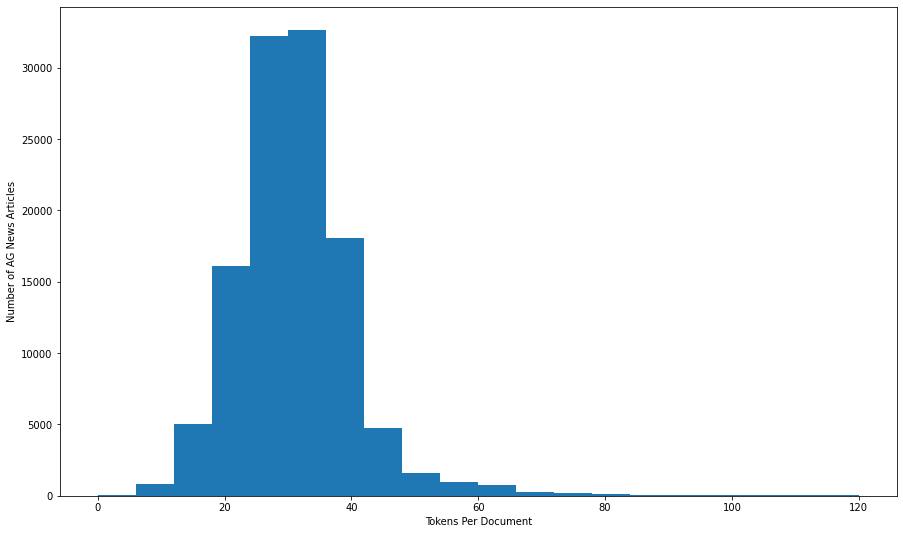

In [ ]:
# Viewing histogram of the number of words per article
plt.figure(figsize=(15,9))
plt.hist(doc_sizes, bins=20,range = (0,120))
plt.xlabel("Tokens Per Document")
plt.ylabel("Number of AG News Articles")

In [ ]:
# Checking what percent of documents have less than n words
n = 30
print("{0:.1%} of documents have less than".format(sum(i <= n for i in doc_sizes)/ len(doc_sizes)), n, "words")

52.6% of documents have less than 30 words


If we cap the output_sequence_length to 30 we're getting all of the words in 52% of the documents and truncating 48% of the documents. 

2. What should be the vocabulary size?

In [ ]:
# Checking number of words in our corpus
len(vocab)

90800

There are currently 90k tokens. Let's restrict this. But what level should we restrict it at? Let's start with the top 1k and see what that looks like.

In [ ]:
%%time
encoder_1000 = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=1000)
encoder_1000.adapt(train_dataset.map(lambda text, label: text))
vocab_1000 = np.array(encoder_1000.get_vocabulary())

Cause: could not parse the source code of <function <lambda> at 0x7fa8b84ec488>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa8b84ec488>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa8b84ec488>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 1min 32s, sys: 26.6 s, total: 1min 58s
Wall time: 1min 4s


The big question is are we restricting this to too small of a list. If so we'll see a large number of unknown words in our documents. Let's check:

In [ ]:
%%time
doc1000_sizes = []
corpus1000 = []
count1000=0
useless = 0
# stop = 0
percents = []
for example, _ in train_dataset.as_numpy_iterator():
  # stop+=1
  # if stop > 5: break
  enc_example = encoder_1000(example)
  num_ones = tf.math.count_nonzero(enc_example==1).numpy()
  percent_ones = round(num_ones*100/len(enc_example))
  # print(f"{percent_ones}%")
  percents.append(percent_ones)

  s = set(list(enc_example.numpy()))
  if s == {1}: useless+=1

  doc1000_sizes.append(len(enc_example))
  corpus1000+=list(enc_example.numpy())

  count1000 += tf.math.count_nonzero(enc_example>1)

CPU times: user 5min 59s, sys: 6.55 s, total: 6min 6s
Wall time: 5min 48s


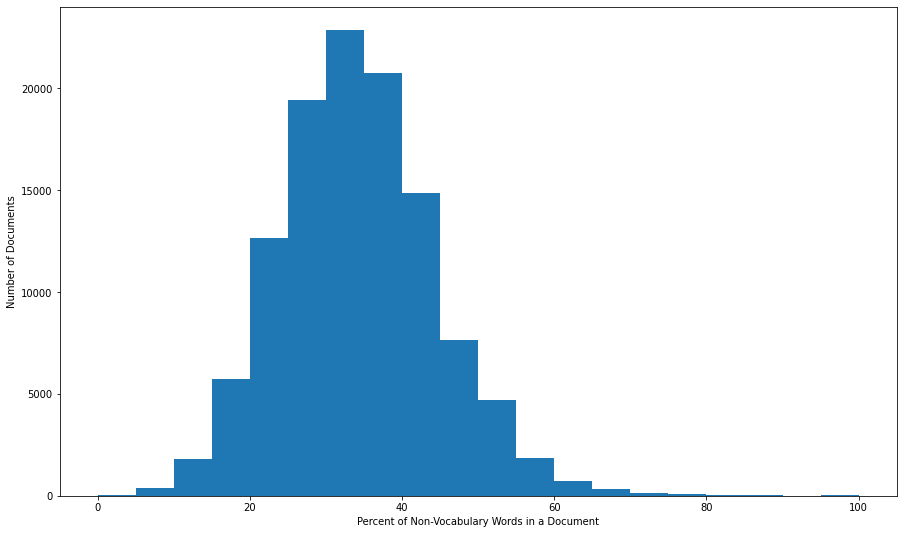

In [ ]:
# Plotting to see the distribution of documents by percent of non-vocab words
plt.figure(figsize=(15,9))
plt.hist(percents, 20)
plt.ylabel('Number of Documents')
plt.xlabel('Percent of Non-Vocabulary Words in a Document');

In [ ]:
# Checking the median/average value for percent of non-vocab words in a doc
print("Median: ",np.median(percents))
print("Average: ",np.average(percents))

Median:  33.0
Average:  33.76071052631579


In [ ]:
# Checking what percent of documents have more than n % blank words in the document
n = 40
print("{0:.1%} of documents have more than".format(sum(i >= n for i in percents)/ len(percents)), n, "% blank words")

26.7% of documents have more than 40 % blank words


We see some data loss when only using the top 1,000. Lets change to the top 100 and see how much worse it gets.

In [ ]:
%%time
encoder_100 = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=100)
encoder_100.adapt(train_dataset.map(lambda text, label: text))
vocab_100 = np.array(encoder_100.get_vocabulary())

Cause: could not parse the source code of <function <lambda> at 0x7fa8b21d76a8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa8b21d76a8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa8b21d76a8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 1min 36s, sys: 26.1 s, total: 2min 2s
Wall time: 1min 7s


In [ ]:
%%time

percents100 = []
for example, _ in train_dataset.as_numpy_iterator():
  enc_example = encoder_100(example)
  num_ones = tf.math.count_nonzero(enc_example==1).numpy()
  percent_ones = round(num_ones*100/len(enc_example))
  percents100.append(percent_ones)

CPU times: user 5min 31s, sys: 7.31 s, total: 5min 38s
Wall time: 5min 21s


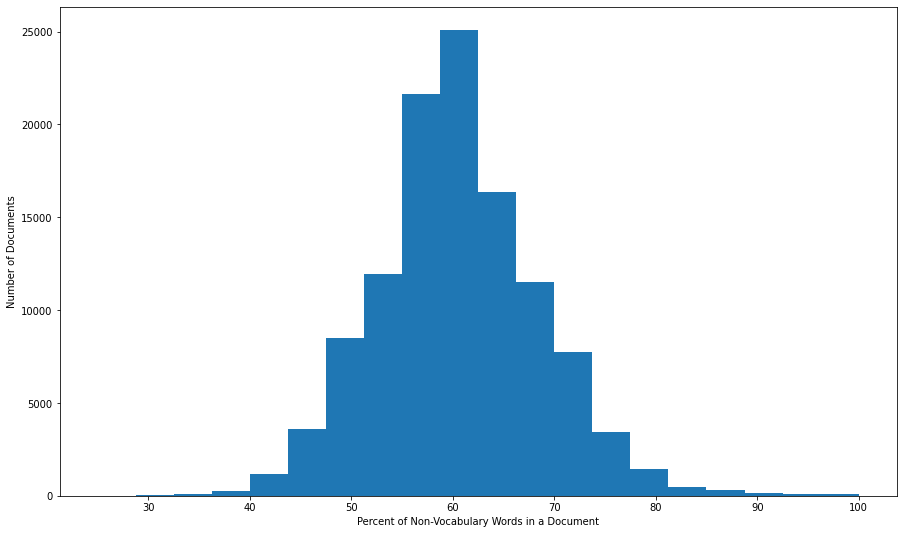

In [ ]:
# Plotting to see the distribution of documents by percent of non-vocab words
plt.figure(figsize=(15,9))
plt.hist(percents100, 20)
plt.ylabel('Number of Documents')
plt.xlabel('Percent of Non-Vocabulary Words in a Document');

In [ ]:
# Checking the median/average value for percent of non-vocab words in a doc
print("Median: ",np.median(percents100))
print("Average: ",np.average(percents100))

Median:  60.0
Average:  60.42278947368421


In [ ]:
# Checking what percent of documents have more than n % blank words in the document
n = 40
print("{0:.1%} of documents have more than".format(sum(i >= n for i in percents100)/ len(percents100)), n, "% blank words")

99.7% of documents have more than 40 % blank words


Most documents now have ~60% of the words blank, a definite increase from ~33% with the top 1,000 words. We can see the nonlinear relationship between top N words and the percent of blank words in the average document. By reducing the words by 90% we've only doubled the percent of blank words. <br>
Clearly using only the top 100 words would be too restrictive.

3. Should we include the top most common words?<br>
What effect does removing them have? Does it dramatically increase the blank word count?

In [ ]:
# Checking the top 30 words. Blank and unknown are the two most common as expected
print(vocab[:30])

['' '[UNK]' 'the' 'a' 'to' 'of' 'in' 'and' 'on' 'for' 'that' '39s' 'with'
 'its' 'as' 'at' 'is' 'said' 'by' 'it' 'has' 'new' 'an' 'from' 'his' 'us'
 'will' 'was' 'reuters' 'after']


In [ ]:
# Checking the bottom 30 least common words
print(vocab[-30:])

['022' '021204' '02112004' '020015' '018percent' '018' '0152' '0151' '015'
 '01473' '0141' '0133' '0125' '0121' '012' '011micron' '0119' '01112004'
 '011104' '01102004' '011' '0100' '008s' '007percent' '007' '005' '004'
 '0013' '000th' '000strong']


###Final Text Encoding
Based on the results of Experiment A we'll create one final embedding with what we've learned:
*   Including the top words
*   Output Sequence = 30
*   Max tokens = 5,000



In [ ]:
%%time
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=5000, output_sequence_length= 30)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())

Cause: could not parse the source code of <function <lambda> at 0x7fa92d50e0d0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa92d50e0d0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7fa92d50e0d0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 1min 43s, sys: 26.5 s, total: 2min 9s
Wall time: 1min 13s


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

## Experiment B - RNN
We'll try several experiments by tweaking (i) architecture (ii) Bidirectional/unidirectional & other hyper parameters, including regularization.
1.    Simple RNN
2.    1 Layer GRU
3.    1 Layer Bidirectional GRU
4.    1 Layer Bidirectional GRU with Dropout   

We'll start with a few functions to make things easier to repeat. 
In order to be able to compare across experiments we'll keep some parameters the same. To do this we'll use some formulas so that all of our models compile and fit the same way.
We will also want to print all of the results and record the time it takes the models to run.

In [ ]:
def compile_and_fit(model_n):
  start = datetime.now()
  model_n.compile(optimizer=tf.keras.optimizers.RMSprop()
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy()
              ,metrics=['accuracy'])
  history_n = model_n.fit(train_dataset
                    ,epochs = 10
                    ,validation_data=validation_dataset
                    )
  end = datetime.now()
  time_n = end - start
  return history_n, time_n

In [ ]:
# Creating a function to allow for easier plotting
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### 1. Simple RNN

In [ ]:
# Starting with a simple RNN
model_1 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=32)
                              ,tf.keras.layers.SimpleRNN(32)
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_1, time_1 = compile_and_fit(model_1)

Epoch 1/10
1782/1782 [==============================] - 19s 10ms/step - loss: 0.7993 - accuracy: 0.6619 - val_loss: 0.4610 - val_accuracy: 0.8437
Epoch 2/10
1782/1782 [==============================] - 17s 10ms/step - loss: 0.3839 - accuracy: 0.8690 - val_loss: 0.3821 - val_accuracy: 0.8695
Epoch 3/10
1782/1782 [==============================] - 18s 10ms/step - loss: 0.3381 - accuracy: 0.8847 - val_loss: 0.4211 - val_accuracy: 0.8580
Epoch 4/10
1782/1782 [==============================] - 20s 11ms/step - loss: 0.3135 - accuracy: 0.8945 - val_loss: 0.4119 - val_accuracy: 0.8703
Epoch 5/10
1782/1782 [==============================] - 20s 11ms/step - loss: 0.2964 - accuracy: 0.8989 - val_loss: 0.4168 - val_accuracy: 0.8712
Epoch 6/10
1782/1782 [==============================] - 18s 10ms/step - loss: 0.2787 - accuracy: 0.9060 - val_loss: 0.3913 - val_accuracy: 0.8695
Epoch 7/10
1782/1782 [==============================] - 18s 10ms/step - loss: 0.2645 - accuracy: 0.9119 - val_loss: 0.3614 -

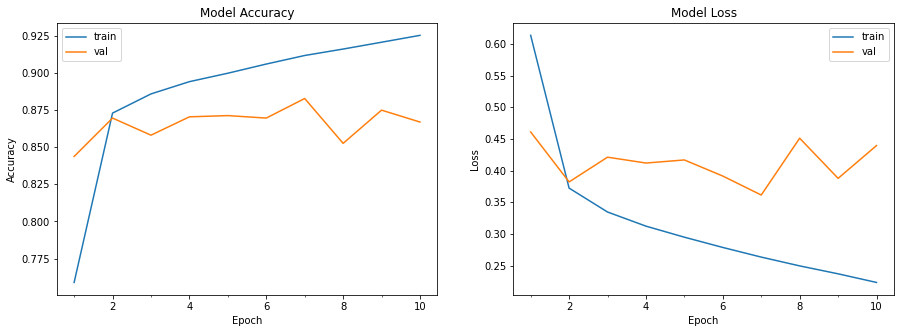

In [ ]:
plot_model_history(history_1)

### 2. 1 Layer GRU Model

In [ ]:
model_2 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=32)
                              ,tf.keras.layers.GRU(32)
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_2, time_2 = compile_and_fit(model_2)

Epoch 1/10
1782/1782 [==============================] - 36s 19ms/step - loss: 0.7968 - accuracy: 0.6423 - val_loss: 0.4055 - val_accuracy: 0.8645
Epoch 2/10
1782/1782 [==============================] - 32s 18ms/step - loss: 0.3434 - accuracy: 0.8844 - val_loss: 0.3323 - val_accuracy: 0.8932
Epoch 3/10
1782/1782 [==============================] - 31s 17ms/step - loss: 0.3017 - accuracy: 0.8987 - val_loss: 0.3220 - val_accuracy: 0.8935
Epoch 4/10
1782/1782 [==============================] - 31s 17ms/step - loss: 0.2879 - accuracy: 0.9022 - val_loss: 0.3159 - val_accuracy: 0.8977
Epoch 5/10
1782/1782 [==============================] - 30s 17ms/step - loss: 0.2805 - accuracy: 0.9038 - val_loss: 0.3102 - val_accuracy: 0.8987
Epoch 6/10
1782/1782 [==============================] - 30s 17ms/step - loss: 0.2716 - accuracy: 0.9067 - val_loss: 0.3001 - val_accuracy: 0.9017
Epoch 7/10
1782/1782 [==============================] - 33s 18ms/step - loss: 0.2661 - accuracy: 0.9085 - val_loss: 0.3024 -

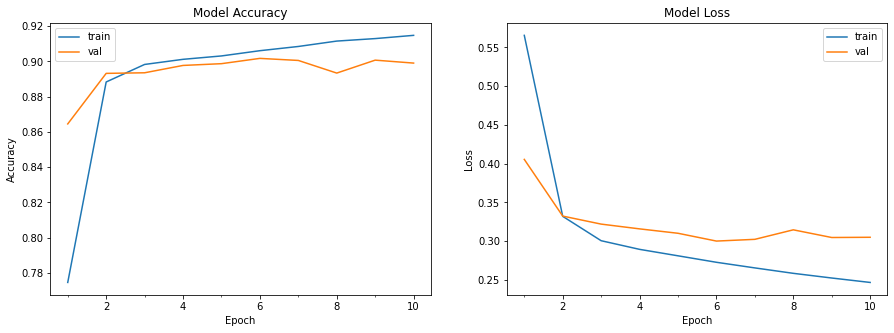

In [ ]:
plot_model_history(history_2)

### 3. 1 Layer BiDirectional GRU Model

In [ ]:
model_3 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_3, time_3 = compile_and_fit(model_3)

Epoch 1/10
1782/1782 [==============================] - 66s 35ms/step - loss: 0.5473 - accuracy: 0.7864 - val_loss: 0.3307 - val_accuracy: 0.8855
Epoch 2/10
1782/1782 [==============================] - 60s 34ms/step - loss: 0.2963 - accuracy: 0.8976 - val_loss: 0.3045 - val_accuracy: 0.8952
Epoch 3/10
1782/1782 [==============================] - 61s 34ms/step - loss: 0.2718 - accuracy: 0.9057 - val_loss: 0.2907 - val_accuracy: 0.9015
Epoch 4/10
1782/1782 [==============================] - 66s 37ms/step - loss: 0.2558 - accuracy: 0.9108 - val_loss: 0.3027 - val_accuracy: 0.9032
Epoch 5/10
1782/1782 [==============================] - 60s 34ms/step - loss: 0.2428 - accuracy: 0.9157 - val_loss: 0.2941 - val_accuracy: 0.9013
Epoch 6/10
1782/1782 [==============================] - 63s 35ms/step - loss: 0.2314 - accuracy: 0.9202 - val_loss: 0.2972 - val_accuracy: 0.9027
Epoch 7/10
1782/1782 [==============================] - 61s 34ms/step - loss: 0.2206 - accuracy: 0.9246 - val_loss: 0.3019 -

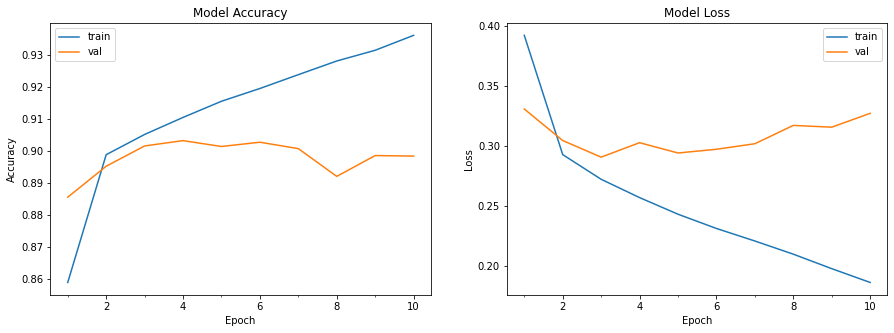

In [ ]:
plot_model_history(history_3)

This model is overfitting our data.

### 4. 1 Layer BiDirectional GRU Model with Dropout

In [ ]:
model_4 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=32)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, dropout=0.2,
                     recurrent_dropout=0.2))
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_4, time_4 = compile_and_fit(model_4)

Epoch 1/10
1782/1782 [==============================] - 110s 59ms/step - loss: 0.6643 - accuracy: 0.7218 - val_loss: 0.3361 - val_accuracy: 0.8863
Epoch 2/10
1782/1782 [==============================] - 103s 58ms/step - loss: 0.3138 - accuracy: 0.8930 - val_loss: 0.3094 - val_accuracy: 0.8960
Epoch 3/10
1782/1782 [==============================] - 109s 61ms/step - loss: 0.2904 - accuracy: 0.8996 - val_loss: 0.2956 - val_accuracy: 0.8992
Epoch 4/10
1782/1782 [==============================] - 103s 58ms/step - loss: 0.2778 - accuracy: 0.9031 - val_loss: 0.3183 - val_accuracy: 0.8953
Epoch 5/10
1782/1782 [==============================] - 101s 57ms/step - loss: 0.2703 - accuracy: 0.9059 - val_loss: 0.2896 - val_accuracy: 0.9013
Epoch 6/10
1782/1782 [==============================] - 106s 60ms/step - loss: 0.2624 - accuracy: 0.9089 - val_loss: 0.2934 - val_accuracy: 0.9008
Epoch 7/10
1782/1782 [==============================] - 106s 59ms/step - loss: 0.2551 - accuracy: 0.9109 - val_loss: 0

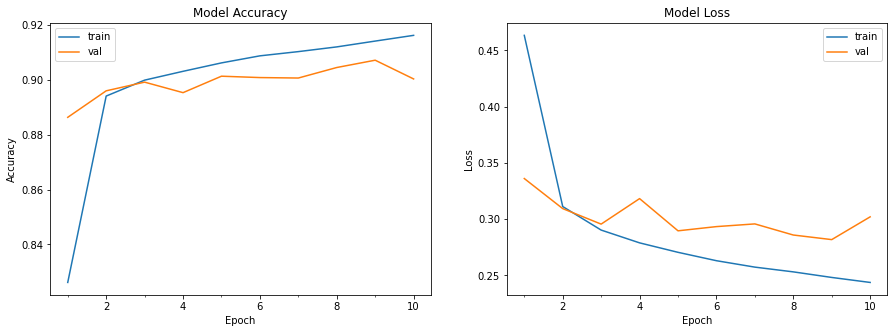

In [ ]:
plot_model_history(history_4)

That looks alot better. We've increased in accuracy and don't appear to be overfitting as bad (at least not until the last epoch). We could possibly stand to increase the model complexity to see if we can get better accuracy.

## Experiment C - LSTM
Now let's change to LSTM models and see what results we get.
5.    1 Layer LSTM
6.    1 Layer Bidirectional LSTM
7.    1 Layer Bidirectional LSTM with Dropout 

### 5. 1 Layer LSTM Model

In [ ]:
model_5 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64)
                              ,tf.keras.layers.LSTM(64)
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_5, time_5 = compile_and_fit(model_5)

Epoch 1/10
1782/1782 [==============================] - 55s 29ms/step - loss: 0.5827 - accuracy: 0.7653 - val_loss: 0.3485 - val_accuracy: 0.8838
Epoch 2/10
1782/1782 [==============================] - 52s 29ms/step - loss: 0.3094 - accuracy: 0.8954 - val_loss: 0.3099 - val_accuracy: 0.8945
Epoch 3/10
1782/1782 [==============================] - 54s 30ms/step - loss: 0.2882 - accuracy: 0.9018 - val_loss: 0.3115 - val_accuracy: 0.8967
Epoch 4/10
1782/1782 [==============================] - 54s 30ms/step - loss: 0.2762 - accuracy: 0.9058 - val_loss: 0.3233 - val_accuracy: 0.8887
Epoch 5/10
1782/1782 [==============================] - 54s 30ms/step - loss: 0.2632 - accuracy: 0.9102 - val_loss: 0.2972 - val_accuracy: 0.8997
Epoch 6/10
1782/1782 [==============================] - 54s 30ms/step - loss: 0.2505 - accuracy: 0.9151 - val_loss: 0.3105 - val_accuracy: 0.8952
Epoch 7/10
1782/1782 [==============================] - 54s 30ms/step - loss: 0.2397 - accuracy: 0.9174 - val_loss: 0.3247 -

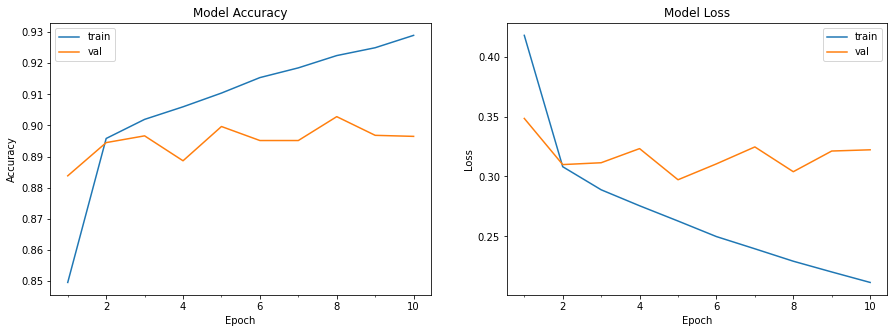

In [ ]:
plot_model_history(history_5)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_3 (TextVe (None, 30)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 30, 64)            320000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 357,444
Trainable params: 357,444
Non-trainable params: 0
_________________________________________________________________


Notes on results...

### 6. 1 Layer BiDirectional LSTM Model

In [ ]:
model_6 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_6, time_6 = compile_and_fit(model_6)

Epoch 1/10
1782/1782 [==============================] - 71s 37ms/step - loss: 0.5357 - accuracy: 0.7941 - val_loss: 0.3328 - val_accuracy: 0.8908
Epoch 2/10
1782/1782 [==============================] - 69s 38ms/step - loss: 0.2954 - accuracy: 0.8988 - val_loss: 0.2984 - val_accuracy: 0.8970
Epoch 3/10
1782/1782 [==============================] - 68s 38ms/step - loss: 0.2708 - accuracy: 0.9063 - val_loss: 0.3189 - val_accuracy: 0.8940
Epoch 4/10
1782/1782 [==============================] - 71s 40ms/step - loss: 0.2560 - accuracy: 0.9111 - val_loss: 0.2933 - val_accuracy: 0.9015
Epoch 5/10
1782/1782 [==============================] - 68s 38ms/step - loss: 0.2433 - accuracy: 0.9160 - val_loss: 0.2895 - val_accuracy: 0.9038
Epoch 6/10
1782/1782 [==============================] - 67s 38ms/step - loss: 0.2302 - accuracy: 0.9206 - val_loss: 0.2995 - val_accuracy: 0.9005
Epoch 7/10
1782/1782 [==============================] - 67s 38ms/step - loss: 0.2204 - accuracy: 0.9248 - val_loss: 0.3035 -

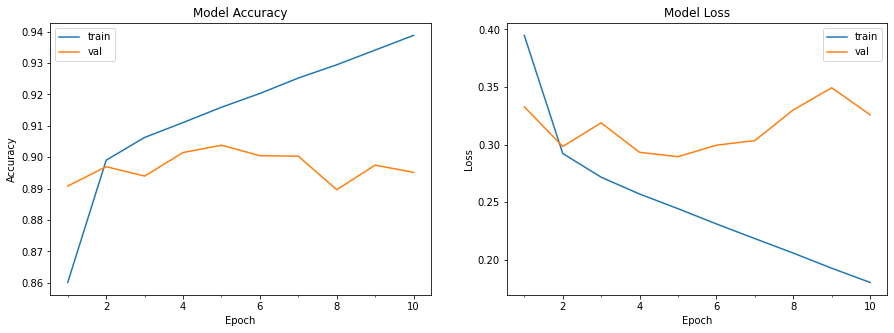

In [ ]:
plot_model_history(history_6)

We're very clearly overfitting at this point. Let's incorporate some dropout in the next experiment to see if that helps.

### 7. 1 Layer BiDirectional LSTM Model with Dropout

In [ ]:
model_7 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2,
                     recurrent_dropout=0.2))
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_7, time_7 = compile_and_fit(model_7)

Epoch 1/10
1782/1782 [==============================] - 146s 79ms/step - loss: 0.5520 - accuracy: 0.7847 - val_loss: 0.3339 - val_accuracy: 0.8853
Epoch 2/10
1782/1782 [==============================] - 140s 78ms/step - loss: 0.3033 - accuracy: 0.8957 - val_loss: 0.3038 - val_accuracy: 0.8978
Epoch 3/10
1782/1782 [==============================] - 136s 76ms/step - loss: 0.2800 - accuracy: 0.9036 - val_loss: 0.2945 - val_accuracy: 0.9017
Epoch 4/10
1782/1782 [==============================] - 142s 80ms/step - loss: 0.2675 - accuracy: 0.9082 - val_loss: 0.2894 - val_accuracy: 0.9043
Epoch 5/10
1782/1782 [==============================] - 139s 78ms/step - loss: 0.2574 - accuracy: 0.9118 - val_loss: 0.2840 - val_accuracy: 0.9020
Epoch 6/10
1782/1782 [==============================] - 148s 83ms/step - loss: 0.2483 - accuracy: 0.9145 - val_loss: 0.2945 - val_accuracy: 0.9022
Epoch 7/10
1782/1782 [==============================] - 140s 79ms/step - loss: 0.2396 - accuracy: 0.9182 - val_loss: 0

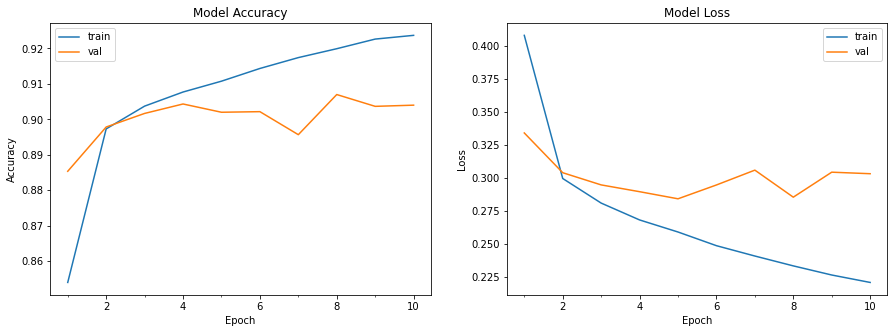

In [ ]:
plot_model_history(history_7)

These results are much better. Again dropout helped solve our overfitting and we have room for increasing our complexity to try to gain more accuracy.

## Experiment D - 1D CovNet
Finally we'll end by testing out the accuracy of a 1 dimensional Convolutional Neural Network and see how it compares to the RNNs.
8. 1D CovNet

In [ ]:
model_8 = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64)
                              ,tf.keras.layers.Conv1D(64, 5, activation='relu')
                              ,tf.keras.layers.MaxPooling1D(5)
                              ,tf.keras.layers.Conv1D(32, 5, activation='relu')
                              ,tf.keras.layers.Dense(32, activation='relu')
                              ,tf.keras.layers.GlobalMaxPooling1D()
                              ,tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
history_8, time_8 = compile_and_fit(model_8)

Epoch 1/10
1782/1782 [==============================] - 17s 9ms/step - loss: 0.5850 - accuracy: 0.7672 - val_loss: 0.3196 - val_accuracy: 0.8917
Epoch 2/10
1782/1782 [==============================] - 16s 9ms/step - loss: 0.2892 - accuracy: 0.9004 - val_loss: 0.3189 - val_accuracy: 0.8953
Epoch 3/10
1782/1782 [==============================] - 16s 9ms/step - loss: 0.2512 - accuracy: 0.9140 - val_loss: 0.3148 - val_accuracy: 0.9010
Epoch 4/10
1782/1782 [==============================] - 17s 9ms/step - loss: 0.2153 - accuracy: 0.9271 - val_loss: 0.3996 - val_accuracy: 0.8833
Epoch 5/10
1782/1782 [==============================] - 16s 9ms/step - loss: 0.1808 - accuracy: 0.9392 - val_loss: 0.4177 - val_accuracy: 0.8837
Epoch 6/10
1782/1782 [==============================] - 16s 9ms/step - loss: 0.1479 - accuracy: 0.9506 - val_loss: 0.4403 - val_accuracy: 0.8868
Epoch 7/10
1782/1782 [==============================] - 16s 9ms/step - loss: 0.1182 - accuracy: 0.9610 - val_loss: 0.5318 - val_ac

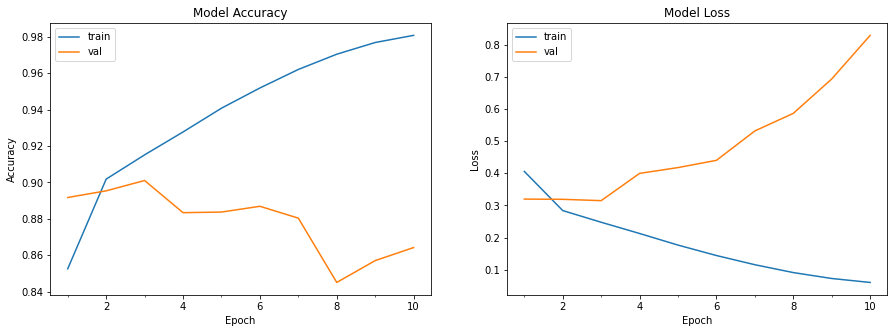

In [ ]:
plot_model_history(history_8)

## Comparing the Results of our Experiments
Here we'll tabularize everything and see how all of the experiments compared.

In [ ]:
# Comparing the accuracy of all of our models on the test set

train_acc = []
total_acc = []
total_loss = []
total_time = []
x = []

for i in range(1,9):
    x.append(i)
    total_time.append(eval("time_" + str(i)))
    loss, accuracy = eval("model_" + str(i) + ".evaluate(test_dataset)")
    train_loss, train_accuracy = eval("model_" + str(i) + ".evaluate(train_dataset)")
    total_acc.append(accuracy)
    total_loss.append(loss)
    train_acc.append(train_accuracy)


1782/1782 [==============================] - 8s 4ms/step - loss: 0.0425 - accuracy: 0.9867


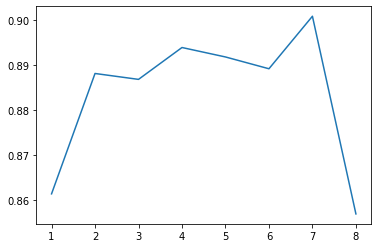

In [ ]:
# Plotting Accuracy
plt.plot(x, total_acc)

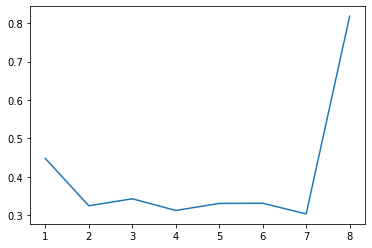

In [ ]:
# Plotting Loss
plt.plot(x, total_loss)

In [ ]:
# Checking Times
for item in range(len(total_time)):
  print("Model ", x[item], ":\t", total_time[item])

Model  1 :	 0:03:03.603329
Model  2 :	 0:05:08.873077
Model  3 :	 0:10:24.990736
Model  4 :	 0:17:39.768853
Model  5 :	 0:09:02.646850
Model  6 :	 0:11:27.222589
Model  7 :	 0:23:35.596060
Model  8 :	 0:02:41.138187


In [ ]:
print("Model with Max Accuracy: \t", np.argmax(total_acc, axis=-1)+1)
print("Model with Min Loss: \t\t", np.argmin(total_loss, axis=-1)+1)
print("Model with Fastest Time: \t", np.argmin(total_time, axis=-1)+1)


Model with Max Accuracy: 	 7
Model with Min Loss: 		 7
Model with Fastest Time: 	 8


Now let's look at all of the models together in a tabular format across all metrics:

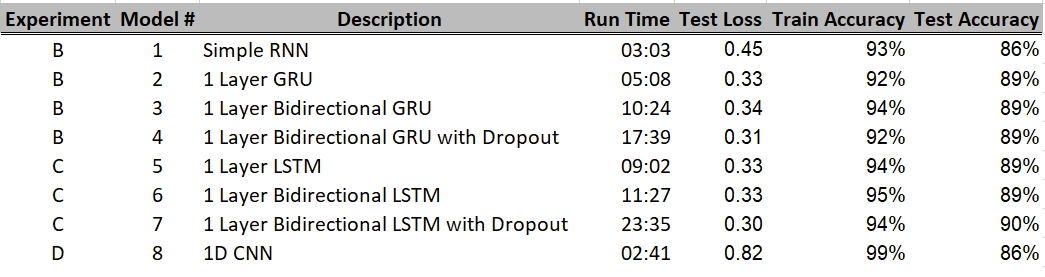